## K-Nearest Neighbors

### K-Nearest Neighbors 
 is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline


### About the dataset
Imagine a Health Center has segmented its base by Maternity patterns, categorizing the Maternity into 5 groups. If demographic data can be used to predict group Maternity, the Health Center can customize offers for individual prospective Mothers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict the class of a new or unknown case.

The example focuses on using demographic data, such as city, age, and so on, to predict usage patterns.

The target field, called Previousoutcomepregnanancy, has five possible values.

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbor.

#### Load Data From CSV File

In [8]:
data=pd.read_csv('KNN/A - Copy (2).csv')
data.head()

,JobNumber,MoEducate,MoAge,MoBloodGroup,CityNumber,TypeDelivery,NumberLiveBirth,NumberDeathNeonate,NumberAboration,EthnicNumber,familymarrige,Neonateweight,taneshlife,Paritypregnancy,Contraceptionbeforepregnancy,Smokingduringpregnancy,Smokingparents,Previousoutcomepregnanancy
0,1,4,19,3,5,1,0,1,0,1,2,2,1,1,2,2,2,4
1,1,1,33,1,5,2,3,1,2,1,2,2,3,6,2,2,2,1
2,1,4,24,3,5,1,1,1,0,1,2,2,1,2,1,2,2,1
3,1,2,35,3,5,1,2,1,3,1,2,4,1,6,1,2,2,3
4,1,1,44,3,5,2,8,1,0,1,2,4,2,9,2,2,2,1


#### Data Visualization and Analysis


In [6]:
data['Previousoutcomepregnanancy'].value_counts()


1    1955
4    1079
3     205
2      96
5       4
Name: Previousoutcomepregnanancy, dtype: int64

array([[<AxesSubplot:title={'center':'CityNumber'}>]], dtype=object)

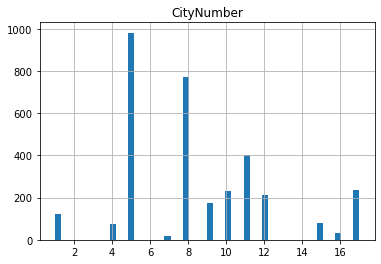

In [10]:
data.hist(column='CityNumber', bins=50)

#### Feature set

In [12]:
data.columns

Index(['JobNumber', 'MoEducate', 'MoAge', 'MoBloodGroup', 'CityNumber',
       'TypeDelivery', 'NumberLiveBirth', 'NumberDeathNeonate',
       'NumberAboration', 'EthnicNumber', 'familymarrige', 'Neonateweight',
       'taneshlife', 'Paritypregnancy', 'Contraceptionbeforepregnancy',
       'Smokingduringpregnancy', 'Smokingparents',
       'Previousoutcomepregnanancy'],
      dtype='object')

#### To use the scikit-learn library, we have to convert the Pandas data frame to a Numpy array:


In [15]:
X = data[['JobNumber', 'MoEducate','MoAge', 'MoBloodGroup', 'CityNumber', 'TypeDelivery', 'NumberLiveBirth','NumberDeathNeonate', 'NumberAboration', 'EthnicNumber', 'familymarrige', 'Neonateweight', 'taneshlife', 'Paritypregnancy', 'Contraceptionbeforepregnancy', 'Smokingduringpregnancy', 'Smokingparents']] .values  #.astype(float)
X[0:5]

array([[ 1,  4, 19,  3,  5,  1,  0,  1,  0,  1,  2,  2,  1,  1,  2,  2,
         2],
       [ 1,  1, 33,  1,  5,  2,  3,  1,  2,  1,  2,  2,  3,  6,  2,  2,
         2],
       [ 1,  4, 24,  3,  5,  1,  1,  1,  0,  1,  2,  2,  1,  2,  1,  2,
         2],
       [ 1,  2, 35,  3,  5,  1,  2,  1,  3,  1,  2,  4,  1,  6,  1,  2,
         2],
       [ 1,  1, 44,  3,  5,  2,  8,  1,  0,  1,  2,  4,  2,  9,  2,  2,
         2]], dtype=int64)

In [16]:
y = data['Previousoutcomepregnanancy'].values
y[0:5]

array([4, 1, 1, 3, 1], dtype=int64)

#### Normalize Data
Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:


In [17]:
print(X[0:5])
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))
X[0:5]

[[ 1  4 19  3  5  1  0  1  0  1  2  2  1  1  2  2  2]
 [ 1  1 33  1  5  2  3  1  2  1  2  2  3  6  2  2  2]
 [ 1  4 24  3  5  1  1  1  0  1  2  2  1  2  1  2  2]
 [ 1  2 35  3  5  1  2  1  3  1  2  4  1  6  1  2  2]
 [ 1  1 44  3  5  2  8  1  0  1  2  4  2  9  2  2  2]]


array([[-0.23170533,  0.71492773, -1.4238584 , -0.44113812, -0.90592972,
        -0.68907425, -1.48963818,  1.04862627, -0.30958493, -0.59267807,
         0.65899799,  0.11096772, -1.41646352, -0.91009343,  0.91467681,
         0.23304522,  0.64407337],
       [-0.23170533, -2.03523782,  0.94548821, -1.40764744, -0.90592972,
         1.45122242,  0.97390906,  1.04862627,  3.19449668, -0.59267807,
         0.65899799,  0.11096772,  1.1987268 ,  2.58841218,  0.91467681,
         0.23304522,  0.64407337],
       [-0.23170533,  0.71492773, -0.57766319, -0.44113812, -0.90592972,
        -0.68907425, -0.66845577,  1.04862627, -0.30958493, -0.59267807,
         0.65899799,  0.11096772, -1.41646352, -0.21039231, -1.09328234,
         0.23304522,  0.64407337],
       [-0.23170533, -1.11851597,  1.28396629, -0.44113812, -0.90592972,
        -0.68907425,  0.15272665,  1.04862627,  4.94653749, -0.59267807,
         0.65899799,  2.36337636, -1.41646352,  2.58841218, -1.09328234,
         0.23304522

#### Train Test Split
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for real world problems.


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2671, 17) (2671,)
Test set: (668, 17) (668,)


## Classification
#### K nearest neighbor (KNN)



In [19]:
from sklearn.neighbors import KNeighborsClassifier


#### Training

Let's start the algorithm with k=4 for now:



In [20]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [21]:
yhat = neigh.predict(X_test)
print (yhat[0:5])
print (y[0:5])

[4 4 4 1 1]
[4 1 1 3 1]


In [22]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8640958442530887
Test set Accuracy:  0.8023952095808383


#### What about other K?
K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose 
k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.


In [23]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.79640719, 0.78143713, 0.80838323, 0.80239521, 0.80838323,
       0.79491018, 0.80389222, 0.79640719, 0.81437126])

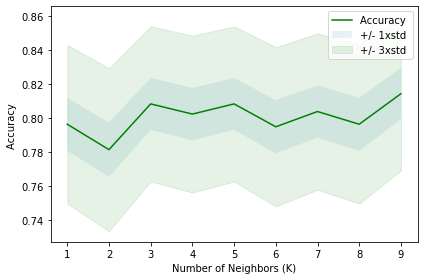

In [24]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [25]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)


The best accuracy was with 0.8143712574850299 with k= 9


### predict


In [29]:
nx = [[ 1, 4, 59, 3, 5, 1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2 ]]
nxs = scaler.transform(nx)
neigh.predict(nxs)



array([1], dtype=int64)